#### What will be the monthly global land and sea temperature anomaly for July 2024, according to the National Oceanic and Atmospheric Administration (NOAA)? - Saicharan Ritwik, 31/07/24

In [1]:
import numpy as np
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

In [3]:
df=pd.read_csv('1850-2024.csv')
df.head()

,Date,Anomaly
0,185001,-0.45
1,185002,-0.20
2,185003,-0.21
3,185004,-0.35
4,185005,-0.29


In [19]:
df.isnull().sum()

Date       0
Anomaly    0
Year       0
dtype: int64

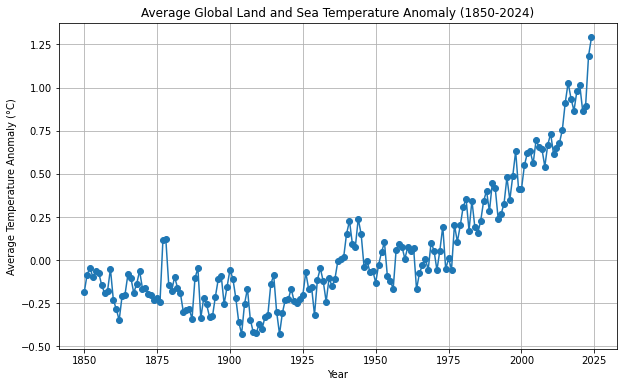

In [4]:
df['Year'] = df['Date'].astype(str).str[:4].astype(int)
yearly_avg_anomaly = df.groupby('Year')['Anomaly'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_anomaly['Year'], yearly_avg_anomaly['Anomaly'], marker='o')
plt.title('Average Global Land and Sea Temperature Anomaly (1850-2024)')
plt.xlabel('Year')
plt.ylabel('Average Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

<ipython-input-8-fb4880b18e31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_24_months['Formatted_Date'] = last_24_months['Date'].astype(str).str[:4] + '-' + last_24_months['Date'].astype(str).str[4:6]


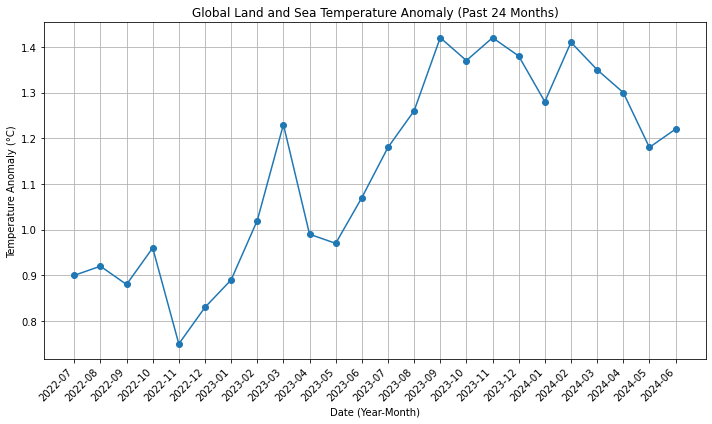

In [8]:
last_24_months = df.tail(24)
last_24_months['Formatted_Date'] = last_24_months['Date'].astype(str).str[:4] + '-' + last_24_months['Date'].astype(str).str[4:6]

plt.figure(figsize=(10, 6))
plt.plot(last_24_months['Formatted_Date'], last_24_months['Anomaly'], marker='o')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.title('Global Land and Sea Temperature Anomaly (Past 24 Months)')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.tight_layout()  
plt.show()

### Trying a regression model.

<ipython-input-39-0652e3cd2bb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_months['Time_Index'] = np.arange(len(recent_months))


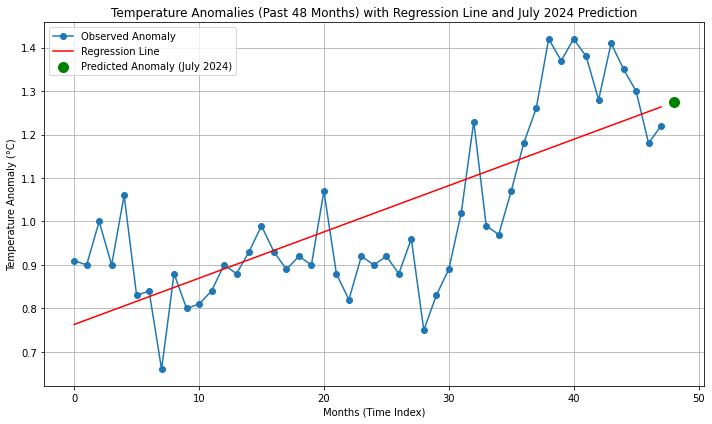

Predicted temperature anomaly for July 2024: 1.2742°C


In [39]:
recent_months = df[-48:]  # Select the past 48 months

# Create a simple time index starting from 0 for the regression
recent_months['Time_Index'] = np.arange(len(recent_months))

# Prepare the data for regression
X_recent = recent_months['Time_Index'].values.reshape(-1, 1)  # Time index as feature
y_recent = recent_months['Anomaly'].values  # Anomaly as target

model_recent = LinearRegression()
model_recent.fit(X_recent, y_recent)
july_2024_index = len(recent_months)
predicted_anomaly_july_2024 = model_recent.predict(np.array([[july_2024_index]]))

plt.figure(figsize=(10, 6))
plt.plot(recent_months['Time_Index'], y_recent, marker='o', label='Observed Anomaly')
regression_line = model_recent.predict(X_recent)
plt.plot(recent_months['Time_Index'], regression_line, color='red', label='Regression Line')

plt.scatter(july_2024_index, predicted_anomaly_july_2024, color='green', label='Predicted Anomaly (July 2024)', s=100)
plt.title('Temperature Anomalies (Past 48 Months) with Regression Line and July 2024 Prediction')
plt.xlabel('Months (Time Index)')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f'Predicted temperature anomaly for July 2024: {predicted_anomaly_july_2024[0]:.4f}°C')

### Changes over months.

<ipython-input-40-8247985637d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_months['Time_Index'] = np.arange(len(recent_months))
<ipython-input-40-8247985637d7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_months['Anomaly_Change'] = recent_months['Anomaly'].diff()


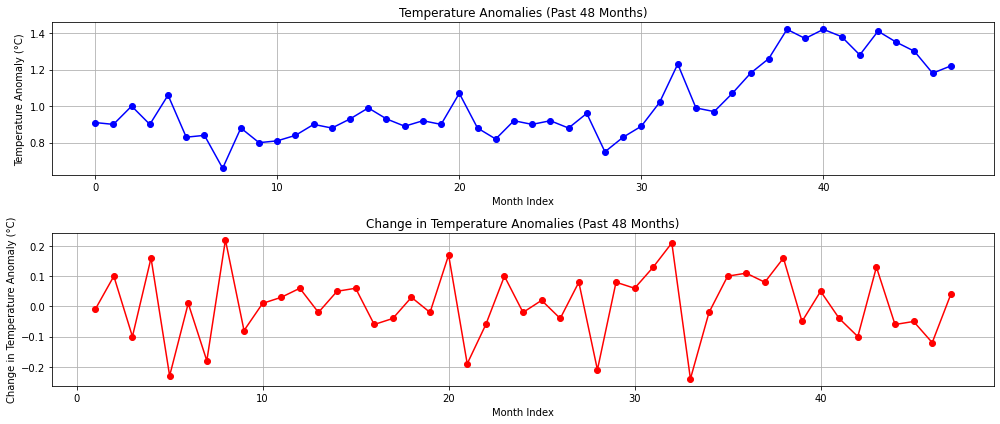

In [40]:
recent_months = df[-48:]  

recent_months['Time_Index'] = np.arange(len(recent_months))
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(recent_months['Time_Index'], recent_months['Anomaly'], marker='o', color='blue')
plt.title('Temperature Anomalies (Past 48 Months)')
plt.xlabel('Month Index')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)

recent_months['Anomaly_Change'] = recent_months['Anomaly'].diff()

plt.subplot(2, 1, 2)
plt.plot(recent_months['Time_Index'], recent_months['Anomaly_Change'], marker='o', color='red')
plt.title('Change in Temperature Anomalies (Past 48 Months)')
plt.xlabel('Month Index')
plt.ylabel('Change in Temperature Anomaly (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [44]:
#print("Anomaly Values:")
#print(recent_months[['Time_Index', 'Anomaly']])

print("\nAnomaly Changes:")
print(recent_months[['Time_Index', 'Anomaly_Change']].dropna())

# Calculate and display volatility
volatility = recent_months['Anomaly_Change'].std()  # Standard deviation as a measure of volatility
print(f"\nVolatility (Standard Deviation of Changes): {volatility:.4f} °C")
print(recent_months['Anomaly_Change'].mean())


Anomaly Changes:
      Time_Index  Anomaly_Change
2047           1           -0.01
2048           2            0.10
2049           3           -0.10
2050           4            0.16
2051           5           -0.23
2052           6            0.01
2053           7           -0.18
2054           8            0.22
2055           9           -0.08
2056          10            0.01
2057          11            0.03
2058          12            0.06
2059          13           -0.02
2060          14            0.05
2061          15            0.06
2062          16           -0.06
2063          17           -0.04
2064          18            0.03
2065          19           -0.02
2066          20            0.17
2067          21           -0.19
2068          22           -0.06
2069          23            0.10
2070          24           -0.02
2071          25            0.02
2072          26           -0.04
2073          27            0.08
2074          28           -0.21
2075          29         

### Latest Data.

In [21]:
data_latest = pd.read_csv('1850-2024-Latest.csv')
data_latest.tail()

,Date,Anomaly
2091,202404,1.29
2092,202405,1.18
2093,202406,1.22
2094,202407,1.22
2095,202408,1.27


In [18]:
data_latest.isnull().sum()

Date       0
Anomaly    0
dtype: int64